In [1]:
import pandas as pd

# Load the dataset
file_path = 'footballScores.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Season,Date,Time,League,Home Team,Away Team,Betfair Odds Home,Betfair Odds Draw,Betfair OddsAway,FTS Odds Home,...,Away.2,Home Pinn Diff,Draw Pinn Diff,Away Pinn Diff,Pinn Home BACK,Pinn Draw BACK,Pinn Away BACK,Pinn Home LAY,Pinn Draw LAY,Pinn Away LAY
0,2012/2013,"Saturday, August 18, 2012",3:00:00 PM,English Premier League,Arsenal,Sunderland,1.43,4.90,9.80,1.31,...,8.71,-0.49,0.78,1.28,-1.00,3.65,-1.00,0.98,-3.72,0.98
1,2012/2013,"Saturday, August 18, 2012",12:00:00 AM,English Premier League,Fulham,Norwich,1.87,3.80,4.80,1.52,...,4.75,0.87,0.35,0.22,0.82,-1.00,-1.00,-0.84,0.98,0.98
2,2012/2013,"Saturday, August 18, 2012",12:00:00 AM,English Premier League,QPR,Swansea,2.06,3.55,4.10,2.62,...,4.15,1.46,0.16,-0.29,-1.00,-1.00,3.09,0.98,0.98,-3.15
3,2012/2013,"Saturday, August 18, 2012",12:00:00 AM,English Premier League,Reading,Stoke,2.44,3.40,3.35,2.70,...,3.22,-0.50,0.89,1.21,-1.00,2.25,-1.00,0.98,-2.30,0.98
4,2012/2013,"Saturday, August 18, 2012",12:00:00 AM,English Premier League,West Brom,Liverpool,4.30,3.70,1.98,2.82,...,1.84,-2.25,-0.29,3.84,3.68,-1.00,-1.00,-3.76,0.98,0.98


# pre processing and data cleaning

In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

# Display dataset information
dataset_info = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15906 entries, 0 to 15905
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             15906 non-null  object 
 1   Date               15906 non-null  object 
 2   Time               15906 non-null  object 
 3   League             15906 non-null  object 
 4   Home Team          15906 non-null  object 
 5   Away Team          15906 non-null  object 
 6   Betfair Odds Home  15906 non-null  float64
 7   Betfair Odds Draw  15906 non-null  float64
 8   Betfair OddsAway   15906 non-null  float64
 9   FTS Odds Home      15906 non-null  float64
 10  FTS Odds Draw      15906 non-null  float64
 11  FTS Odds Away      15906 non-null  float64
 12  Home Difference    15906 non-null  float64
 13  Draw Difference    15906 non-null  float64
 14  Away Difference    15906 non-null  float64
 15  HT Score Home      15904 non-null  float64
 16  HT Score Away      159

In [3]:
def custom_date_parser(date):
    try:
        return pd.to_datetime(date, errors='coerce')  # Coerce errors will set invalid dates to NaT
    except ValueError:
        return pd.NaT  # Return 'Not a Time' for unparseable formats

df['Date'] = df['Date'].apply(custom_date_parser)


In [4]:
# Display unique date values - modify as needed if the dataset is too large
unique_dates = df['Date'].unique()
unique_dates


array(['2012-08-18T00:00:00.000000000', '2012-08-19T00:00:00.000000000',
       '2012-08-20T00:00:00.000000000', ...,
       '2022-05-20T00:00:00.000000000', '2022-05-21T00:00:00.000000000',
       '2022-05-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [5]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time


In [6]:
# For numerical columns, you can fill with mean/median
df['HT Score Home'].fillna(df['HT Score Home'].mean(), inplace=True)
df['HT Score Away'].fillna(df['HT Score Away'].mean(), inplace=True)

# Drop 'Unnamed: 38' as it's entirely null
df.drop(columns=['Unnamed: 38'], inplace=True)


In [7]:
# Check and remove duplicate rows if any
duplicate_rows = df.duplicated().sum()
df = df.drop_duplicates()


In [8]:
# Imputation
df['Ave'].fillna(df['Ave'].mean(), inplace=True)
df['Ave.1'].fillna(df['Ave.1'].mean(), inplace=True)



In [9]:
df = df.drop_duplicates()


In [10]:
df.head()

,Season,Date,Time,League,Home Team,Away Team,Betfair Odds Home,Betfair Odds Draw,Betfair OddsAway,FTS Odds Home,...,Away.2,Home Pinn Diff,Draw Pinn Diff,Away Pinn Diff,Pinn Home BACK,Pinn Draw BACK,Pinn Away BACK,Pinn Home LAY,Pinn Draw LAY,Pinn Away LAY
0,2012/2013,2012-08-18,15:00:00,English Premier League,Arsenal,Sunderland,1.43,4.90,9.80,1.31,...,8.71,-0.49,0.78,1.28,-1.00,3.65,-1.00,0.98,-3.72,0.98
1,2012/2013,2012-08-18,00:00:00,English Premier League,Fulham,Norwich,1.87,3.80,4.80,1.52,...,4.75,0.87,0.35,0.22,0.82,-1.00,-1.00,-0.84,0.98,0.98
2,2012/2013,2012-08-18,00:00:00,English Premier League,QPR,Swansea,2.06,3.55,4.10,2.62,...,4.15,1.46,0.16,-0.29,-1.00,-1.00,3.09,0.98,0.98,-3.15
3,2012/2013,2012-08-18,00:00:00,English Premier League,Reading,Stoke,2.44,3.40,3.35,2.70,...,3.22,-0.50,0.89,1.21,-1.00,2.25,-1.00,0.98,-2.30,0.98
4,2012/2013,2012-08-18,00:00:00,English Premier League,West Brom,Liverpool,4.30,3.70,1.98,2.82,...,1.84,-2.25,-0.29,3.84,3.68,-1.00,-1.00,-3.76,0.98,0.98


In [11]:
summary_stats = df.describe()
summary_stats

,Betfair Odds Home,Betfair Odds Draw,Betfair OddsAway,FTS Odds Home,FTS Odds Draw,FTS Odds Away,Home Difference,Draw Difference,Away Difference,HT Score Home,...,Away.2,Home Pinn Diff,Draw Pinn Diff,Away Pinn Diff,Pinn Home BACK,Pinn Draw BACK,Pinn Away BACK,Pinn Home LAY,Pinn Draw LAY,Pinn Away LAY
count,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,...,15902.000000,15902.000000,15902.000000,15902.000000,15905.000000,15905.000000,15905.000000,15905.000000,15905.000000,15905.000000
mean,2.975968,4.334462,5.264247,3.012984,5.084292,5.845529,0.306523,-0.336198,-0.902394,0.693913,...,5.064735,0.536200,0.357668,0.384349,-0.030057,-0.050274,-0.052732,0.008529,0.020844,0.025763
std,2.393522,1.751880,5.548171,2.722890,3.533073,7.220145,11.449892,8.502643,10.277103,0.850022,...,4.817029,2.999173,1.485849,2.799639,1.360471,1.747706,1.917898,1.372381,1.766835,1.943130
min,1.050000,1.550000,1.100000,1.000000,1.250000,1.050000,-59.080000,-40.710000,-51.790000,0.000000,...,1.080000,-23.870000,-32.970000,-22.470000,-1.000000,-1.000000,-1.000000,-24.830000,-18.860000,-31.320000
25%,1.710000,3.500000,2.460000,1.700000,3.220000,2.500000,-6.760000,-5.970000,-7.090000,0.000000,...,2.410000,-1.280000,-0.460000,-1.190000,-1.000000,-1.000000,-1.000000,-0.750000,0.980000,-0.610000
50%,2.260000,3.750000,3.550000,2.240000,4.000000,3.780000,0.400000,-0.470000,-0.710000,0.000000,...,3.540000,0.520000,0.360000,0.390000,-1.000000,-1.000000,-1.000000,0.980000,0.980000,0.980000
75%,3.200000,4.500000,5.700000,3.200000,5.500000,6.000000,7.500000,4.827500,5.230000,1.000000,...,5.650000,2.340000,1.190000,1.960000,0.740000,-1.000000,0.600000,0.980000,0.980000,0.980000
max,38.000000,36.000000,75.000000,55.000000,65.000000,175.000000,53.030000,51.010000,52.010000,6.000000,...,51.000000,29.580000,10.820000,28.330000,24.330000,18.480000,30.690000,0.980000,0.980000,0.980000


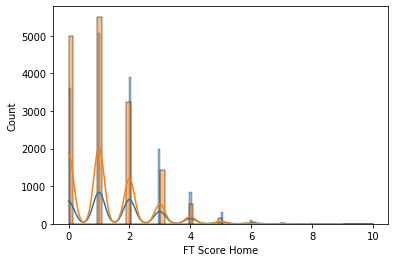

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['FT Score Home'], kde=True)
sns.histplot(df['FT Score Away'], kde=True)
plt.show()


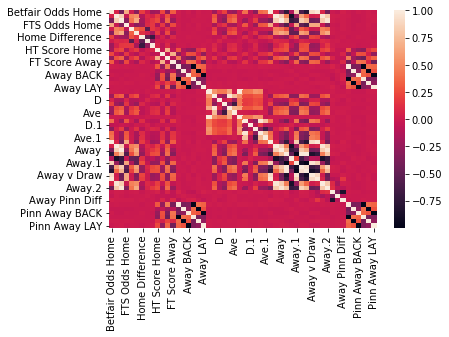

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()


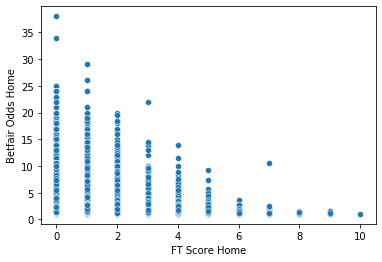

In [14]:
sns.scatterplot(x='FT Score Home', y='Betfair Odds Home', data=df)
plt.show()


In [15]:
# Assuming 'Date' is already converted to datetime
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday


In [16]:
df['Home Team Wins'] = df.apply(lambda x: 1 if x['FT Score Home'] > x['FT Score Away'] else 0, axis=1)
df['Away Team Wins'] = df.apply(lambda x: 1 if x['FT Score Away'] > x['FT Score Home'] else 0, axis=1)


In [17]:
df['Implied Probability Home Win'] = 1 / df['Betfair Odds Home']
df['Implied Probability Draw'] = 1 / df['Betfair Odds Draw']
df['Implied Probability Away Win'] = 1 / df['Betfair OddsAway ']


In [18]:
# Initialize columns for historical statistics
df['HomeTeamWinStreak'] = 0
df['AwayTeamWinStreak'] = 0
df['HomeTeamGoalsScored'] = 0
df['AwayTeamGoalsScored'] = 0
df['HomeTeamGoalsConceded'] = 0
df['AwayTeamGoalsConceded'] = 0

# Define a dictionary to keep track of team statistics
teams_stats = {}

for i, row in df.iterrows():
    home_team = row['Home']
    away_team = row['Away']
    
    # Initialize the team stats if not already done
    if home_team not in teams_stats:
        teams_stats[home_team] = {'WinStreak': 0, 'GoalsScored': 0, 'GoalsConceded': 0}
    if away_team not in teams_stats:
        teams_stats[away_team] = {'WinStreak': 0, 'GoalsScored': 0, 'GoalsConceded': 0}
    
    # Get historical stats for the teams involved in the match
    df.at[i, 'HomeTeamWinStreak'] = teams_stats[home_team]['WinStreak']
    df.at[i, 'AwayTeamWinStreak'] = teams_stats[away_team]['WinStreak']
    df.at[i, 'HomeTeamGoalsScored'] = teams_stats[home_team]['GoalsScored']
    df.at[i, 'AwayTeamGoalsScored'] = teams_stats[away_team]['GoalsScored']
    df.at[i, 'HomeTeamGoalsConceded'] = teams_stats[home_team]['GoalsConceded']
    df.at[i, 'AwayTeamGoalsConceded'] = teams_stats[away_team]['GoalsConceded']
    
    # Update team stats
    if row['FT Score Home'] > row['FT Score Away']:
        teams_stats[home_team]['WinStreak'] += 1
        teams_stats[away_team]['WinStreak'] = 0
    elif row['FT Score Home'] < row['FT Score Away']:
        teams_stats[away_team]['WinStreak'] += 1
        teams_stats[home_team]['WinStreak'] = 0
    else:
        teams_stats[home_team]['WinStreak'] = 0
        teams_stats[away_team]['WinStreak'] = 0
        
    teams_stats[home_team]['GoalsScored'] += row['FT Score Home']
    teams_stats[home_team]['GoalsConceded'] += row['FT Score Away']
    teams_stats[away_team]['GoalsScored'] += row['FT Score Away']
    teams_stats[away_team]['GoalsConceded'] += row['FT Score Home']


In [19]:
list(df)

['Season',
 'Date',
 'Time',
 'League',
 'Home Team',
 'Away Team',
 'Betfair Odds Home',
 'Betfair Odds Draw',
 'Betfair OddsAway ',
 'FTS Odds Home',
 'FTS Odds Draw',
 'FTS Odds Away ',
 'Home Difference',
 'Draw Difference',
 'Away Difference',
 'HT Score Home',
 'HT Score Away',
 'FT Score Home',
 'FT Score Away',
 'FT1X2',
 'Home BACK',
 'Draw BACK',
 'Away BACK',
 'Home LAY',
 'Draw LAY',
 'Away LAY',
 'GP',
 'W',
 'D',
 'L',
 'Pts',
 'Ave',
 'GP.1',
 'W.1',
 'D.1',
 'L.1',
 'Pts.1',
 'Ave.1',
 'Colour Index',
 'Colour Index.1',
 'Home',
 'Draw',
 'Away',
 'Home.1',
 'Draw.1',
 'Away.1',
 'Home  v Draw',
 'Home v Away',
 'Away v Draw',
 'Home.2',
 'Draw.2',
 'Away.2',
 'Home Pinn Diff',
 'Draw Pinn Diff',
 'Away Pinn Diff',
 'Pinn Home BACK',
 'Pinn Draw BACK',
 'Pinn Away BACK',
 ' Pinn Home LAY',
 'Pinn Draw LAY',
 'Pinn Away LAY',
 'Year',
 'Month',
 'Day',
 'Weekday',
 'Home Team Wins',
 'Away Team Wins',
 'Implied Probability Home Win',
 'Implied Probability Draw',
 'Implie

In [20]:
# Convert season to the start year (or end year, depending on your preference)
df['Season'] = df['Season'].apply(lambda x: int(x.split('/')[0]))


In [21]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract parts of the dates
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame

# Define features and target
exclude_columns = ['Date', 'Time', 'FT1X2', 'Colour Index', 'Colour Index.1']  # Non-numeric and target columns
X = df.drop(columns=exclude_columns + ['Home BACK', 'Draw BACK', 'Away BACK'])  # Exclude target variables for X
y_home_back = df['Home BACK']  # Target variable

# Handle NaN and infinite values in features
X = X.select_dtypes(include=[np.number])  # Select only numeric columns
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
X.fillna(X.mean(), inplace=True)  # Fill NaN with column mean

# Handle NaN and infinite values in the target
y_home_back.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
y_home_back.fillna(y_home_back.mean(), inplace=True)  # Fill NaN with mean

# Split the dataset into training and test sets
X_train, X_test, y_train_home_back, y_test_home_back = train_test_split(X, y_home_back, test_size=0.3, random_state=42)

# Ensure no NaN or infinite values are present in the numeric columns
assert not X_train.isnull().values.any(), "NaN values found in X_train"
assert not np.isinf(X_train.values).any(), "Infinite values found in X_train"

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
bestfeatures_home_back = SelectKBest(score_func=f_classif, k='all')  # 'all' to select based on all features
fit_home_back = bestfeatures_home_back.fit(X_train_scaled, y_train_home_back)

# Extract feature scores
dfscores_home_back = pd.DataFrame(fit_home_back.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# Combine the scores and columns into a single DataFrame
featureScores_home_back = pd.concat([dfcolumns, dfscores_home_back], axis=1)
featureScores_home_back.columns = ['Feature', 'Score']  # Naming the dataframe columns

# Sort the DataFrame by the Score in descending order
featureScores_home_back = featureScores_home_back.sort_values(by='Score', ascending=False)

# Print the sorted feature scores
print(featureScores_home_back)


           Feature         Score
54  Home Team Wins  3.903913e+16
14        Home LAY  1.875941e+08
44  Pinn Home BACK  4.533066e+03
47   Pinn Home LAY  4.436531e+03
31            Away  2.153485e+02
..             ...           ...
25             D.1  9.416842e-01
51           Month  9.168513e-01
23            GP.1  8.844112e-01
17              GP  8.748588e-01
53         Weekday  7.468171e-01

[65 rows x 2 columns]


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train_home_back)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_home_back, y_pred)
r2 = r2_score(y_test_home_back, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 3.7102209446108507e-06
R^2 Score: 0.9999980835547089


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Ensure your features and target variable are correctly defined and preprocessed
X_scaled = scaler.fit_transform(X)  # Assuming X is already defined and excludes any target or leaky features
y_home_back = df['Home BACK']       # Assuming y_home_back is correctly defined

# Perform 5-fold cross-validation
cv_scores = cross_val_score(LinearRegression(), X_scaled, y_home_back, cv=5, scoring='r2')

print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())


Cross-validated R^2 scores: [0.99999788 0.9999978  0.99999812 0.99999815 0.99999663]
Mean R^2 score: 0.9999977168972961


In [25]:
# Assuming your dataset 'df' has a 'Date' column in datetime format and is sorted
split_index = int(len(df) * 0.7)  # 70% for training

# Splitting the dataset based on the index
X_train_temporal = X_scaled[:split_index]
X_test_temporal = X_scaled[split_index:]
y_train_temporal = y_home_back[:split_index]
y_test_temporal = y_home_back[split_index:]

# Fit the model on the training set
model_temporal = LinearRegression()
model_temporal.fit(X_train_temporal, y_train_temporal)

# Predict on the test set
y_pred_temporal = model_temporal.predict(X_test_temporal)

# Evaluate the model
mse_temporal = mean_squared_error(y_test_temporal, y_pred_temporal)
r2_temporal = r2_score(y_test_temporal, y_pred_temporal)

print(f"Temporal Validation - Mean Squared Error: {mse_temporal}")
print(f"Temporal Validation - R^2 Score: {r2_temporal}")


Temporal Validation - Mean Squared Error: 5.317114637323577e-06
Temporal Validation - R^2 Score: 0.9999973167925313


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Cross-validation
cv_scores = cross_val_score(LinearRegression(), X_scaled, y_home_back, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())

# Temporal validation (assuming temporal split has been done)
model = LinearRegression()
model.fit(X_train_temporal, y_train_temporal)
y_pred_temporal = model.predict(X_test_temporal)
print("Temporal Validation - R^2 Score:", r2_score(y_test_temporal, y_pred_temporal))


Cross-validated R^2 scores: [0.99999788 0.9999978  0.99999812 0.99999815 0.99999663]
Mean R^2 score: 0.9999977168972961
Temporal Validation - R^2 Score: 0.9999973167925313


In [27]:
# Adjusting the splitting conditions to match the 'Season' format in the dataset
train_df = df[df['Season'].astype(int) <= 2020]  # Training data up to and including the 2020 season
test_df = df[df['Season'].isin(['2021', '2022'])]  # Testing data for the 2021 and 2022 seasons

# Verify the sizes again to ensure correctness
print(f"Corrected training set size: {train_df.shape}")
print(f"Corrected testing set size: {test_df.shape}")


Corrected training set size: (13014, 76)
Corrected testing set size: (2892, 76)


In [28]:
# Fill NaN values in the original dataframes before scaling
X_train_filled = X_train.fillna(X_train.mean())
X_test_filled = X_test.fillna(X_test.mean())

# Replace infinity values with NaN, then fill them
X_train_filled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_filled.fillna(X_train_filled.mean(), inplace=True)

X_test_filled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_filled.fillna(X_test_filled.mean(), inplace=True)

# Now, apply the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)
X_test_scaled = scaler.transform(X_test_filled)


In [29]:
assert not np.isnan(X_train_scaled).any(), "NaN values found in X_train_scaled"
assert not np.isinf(X_train_scaled).any(), "Infinity values found in X_train_scaled"

assert not np.isnan(X_test_scaled).any(), "NaN values found in X_test_scaled"
assert not np.isinf(X_test_scaled).any(), "Infinity values found in X_test_scaled"


In [30]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_home_back)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_home_back, y_pred)
r2 = r2_score(y_test_home_back, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 3.7102209446108507e-06
R^2 Score: 0.9999980835547089


In [31]:
df.columns.values

array(['Season', 'Date', 'Time', 'League', 'Home Team', 'Away Team',
       'Betfair Odds Home', 'Betfair Odds Draw', 'Betfair OddsAway ',
       'FTS Odds Home', 'FTS Odds Draw', 'FTS Odds Away ',
       'Home Difference', 'Draw Difference', 'Away Difference',
       'HT Score Home', 'HT Score Away', 'FT Score Home', 'FT Score Away',
       'FT1X2', 'Home BACK', 'Draw BACK', 'Away BACK', 'Home LAY',
       'Draw LAY', 'Away LAY', 'GP', 'W', 'D', 'L', 'Pts', 'Ave', 'GP.1',
       'W.1', 'D.1', 'L.1', 'Pts.1', 'Ave.1', 'Colour Index',
       'Colour Index.1', 'Home', 'Draw', 'Away', 'Home.1', 'Draw.1',
       'Away.1', 'Home  v Draw', 'Home v Away', 'Away v Draw', 'Home.2',
       'Draw.2', 'Away.2', 'Home Pinn Diff', 'Draw Pinn Diff',
       'Away Pinn Diff', 'Pinn Home BACK', 'Pinn Draw BACK',
       'Pinn Away BACK', ' Pinn Home LAY', 'Pinn Draw LAY',
       'Pinn Away LAY', 'Year', 'Month', 'Day', 'Weekday',
       'Home Team Wins', 'Away Team Wins', 'Implied Probability Home Win',


In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values for Ridge Regression
parameters = {'alpha': [0.1, 1, 10, 100, 1000]}

ridge = Ridge()
model = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
model.fit(X_train_scaled, y_train_home_back)

print("Best parameters:", model.best_params_)
print("Best score:", model.best_score_)

# Evaluate on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test_home_back, y_pred)
r2 = r2_score(y_test_home_back, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R^2 Score: {r2}")


Best parameters: {'alpha': 0.1}
Best score: 0.9999980228426931
Test MSE: 3.7174458265830756e-06
Test R^2 Score: 0.9999980798228311


In [33]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming X_train_scaled and X_test_scaled are your feature sets
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [34]:
from sklearn.model_selection import cross_val_score, KFold

# Using Ridge as an example model
model = Ridge(alpha=1.0)

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_poly, y_train_home_back, cv=kf, scoring='r2')

print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())


Cross-validated R^2 scores: [0.99999432 0.99997074 0.99969718 0.999993   0.99971283 0.99999379
 0.99999297 0.99999416 0.99986489 0.99998294]
Mean R^2 score: 0.9999196811502256


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load external data
external_df = pd.read_csv('2023-2024.csv')

# Exclude 'Season' before any processing that involves numeric operations
external_df.drop(columns=['Season'], inplace=True, errors='ignore')

# Fill missing values
numeric_columns = external_df.select_dtypes(include=['float64', 'int64']).columns
external_df[numeric_columns] = external_df[numeric_columns].fillna(external_df[numeric_columns].mean())

# One-hot encode categorical variables
categorical_columns = ['League', 'Home Team', 'Away Team']  # Adjust as needed
external_df_encoded = pd.get_dummies(external_df, columns=categorical_columns, drop_first=True)

# Align external_df_encoded with the model's feature set
missing_cols = set(X_train.columns) - set(external_df_encoded.columns)
for c in missing_cols:
    external_df_encoded[c] = 0
external_df_encoded = external_df_encoded[X_train.columns]

# Scale features
scaler = StandardScaler()
X_external_scaled = scaler.fit_transform(external_df_encoded)



In [36]:
# Assuming X_train_scaled and y_train_home_back are defined and prepared
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge = Ridge()
model = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
model.fit(X_train_scaled, y_train_home_back)

# Now model is fitted and can be used for predictions


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]}, scoring='r2')

In [37]:
import joblib

# Save the model to disk
joblib.dump(model, 'ridge_model.pkl')

# Later or elsewhere, load the fitted model from disk
model = joblib.load('ridge_model.pkl')


In [38]:
# Assuming X_external_scaled is prepared
y_external_pred = model.predict(X_external_scaled)

y_external = external_df['Home BACK'] 
# Evaluate the predictions
from sklearn.metrics import mean_squared_error, r2_score

external_mse = mean_squared_error(y_external, y_external_pred)
external_r2 = r2_score(y_external, y_external_pred)

print(f"External MSE: {external_mse}")
print(f"External R^2 Score: {external_r2}")


External MSE: 0.010074705468004907
External R^2 Score: 0.9936347849953646


In [39]:
# Initializations
total_bets_placed = 0
total_profit_loss = 0
stake = 10  # Define your stake amount; adjust as needed

threshold_adjustment_factor = 0.95  # Example factor to slightly lower the threshold

for index, row in df.iterrows():
    implied_prob = 1 / row['Betfair Odds Home']
    model_prob = row['Implied Probability Home Win']  # Replace with your model's probability
    
    # Adjust the comparison by a factor to test if the condition was too strict
    if model_prob > (implied_prob * threshold_adjustment_factor):
        total_bets_placed += 1
        if row['FT1X2'] == '1':  # Assuming '1' indicates a home win
            winnings = (row['Betfair Odds Home'] - 1) * stake
            total_profit_loss += winnings
        else:
            total_profit_loss -= stake

print(f"Total Bets Placed: {total_bets_placed}")
print(f"Total Profit/Loss: {total_profit_loss}")


Total Bets Placed: 15906
Total Profit/Loss: -118.7000000000002


In [40]:
# Initialize variables for simulation results
total_bets_placed = 0
total_profit_loss = 0
stake = 1  # Fixed stake for each bet

# Add diagnostic counters
no_value_bets_counter = 0  # Count how many times no value bet is found

for index, row in df.iterrows():
    # Calculate implied probabilities for each outcome
    implied_prob_home = 1 / row['Betfair Odds Home']
    implied_prob_draw = 1 / row['Betfair Odds Draw']
    implied_prob_away = 1 / row['Betfair OddsAway ']
    
    # Your model's actual predictions
    model_prob_home = row['Implied Probability Home Win']
    model_prob_draw = row['Implied Probability Draw']
    model_prob_away = row['Implied Probability Away Win']
    
    # Identify the outcome with the highest value bet
    outcomes = [('1', model_prob_home - implied_prob_home, row['Betfair Odds Home']),
                ('X', model_prob_draw - implied_prob_draw, row['Betfair Odds Draw']),
                ('2', model_prob_away - implied_prob_away, row['Betfair OddsAway '])]
    
    best_bet = max(outcomes, key=lambda item: item[1])

    # Check and place bets
    if best_bet[1] > 0:
        total_bets_placed += 1
        if row['FT1X2'] == best_bet[0]:  # Successful bet
            winnings = (best_bet[2] - 1) * stake
            total_profit_loss += winnings
        else:  # Lost bet
            total_profit_loss -= stake
    else:
        no_value_bets_counter += 1

# Diagnostic prints
print(f"Total Bets Placed: {total_bets_placed}")
print(f"Total Profit/Loss: {total_profit_loss}")
print(f"No value bets found: {no_value_bets_counter}")


Total Bets Placed: 0
Total Profit/Loss: 0
No value bets found: 15906


In [41]:
model

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]}, scoring='r2')

In [42]:
def simulate_betting_strategy(predictions, actual_outcomes, odds, threshold=0.5, stake=1):
    """
    Simulate betting strategy based on model predictions.

    :param predictions: Model predictions for 'Home BACK'.
    :param actual_outcomes: Actual outcomes (1 for home win, 0 otherwise).
    :param odds: Betting odds for 'Home BACK'.
    :param threshold: Confidence threshold for placing a bet.
    :param stake: The amount bet on each game.
    :return: Total profit or loss from the betting strategy.
    """
    total_profit = 0
    for pred, actual, odd in zip(predictions, actual_outcomes, odds):
        if pred > threshold:  # Model is confident in a home win
            if actual == 1:  # Home team wins
                profit = (odd - 1) * stake  # Winnings minus the staked amount
            else:
                profit = -stake  # Loss (the staked amount)
            total_profit += profit
    return total_profit

# Assuming you have y_pred (predictions) ready and y_external, odds_home_back for the external dataset
# Note: You'll need to adjust or create odds_home_back based on your external data

y_external_pred = model.predict(X_external_scaled)  # Ensure this is done
y_external = external_df['Home BACK'].values  # Actual outcomes
odds_home_back = external_df['Betfair Odds Home'].values  # Adjust based on your column name

# Run the simulation
profit = simulate_betting_strategy(y_external_pred, y_external, odds_home_back, threshold=0.5, stake=10)
print(f"Total Profit/Loss: {profit}")


Total Profit/Loss: -3060


In [43]:
# Simplified assumption: lower odds = higher probability (not accurate but for demonstration)
df['Home Prob'] = 1 / df['Betfair Odds Home']
df['Draw Prob'] = 1 / df['Betfair Odds Draw']
df['Away Prob'] = 1 / df['Betfair OddsAway ']

# Normalize these probabilities so they sum to 1 for each row
prob_sum = df['Home Prob'] + df['Draw Prob'] + df['Away Prob']
df['Home Prob'] /= prob_sum
df['Draw Prob'] /= prob_sum
df['Away Prob'] /= prob_sum


In [44]:
# Encoding actual outcomes
# Assuming '1' for home win, 'X' for draw, '2' for away win in 'FT1X2' column
df['Actual Outcome'] = df['FT1X2'].map({'1': 1, 'X': 0, '2': -1})


In [45]:
df.columns.values

array(['Season', 'Date', 'Time', 'League', 'Home Team', 'Away Team',
       'Betfair Odds Home', 'Betfair Odds Draw', 'Betfair OddsAway ',
       'FTS Odds Home', 'FTS Odds Draw', 'FTS Odds Away ',
       'Home Difference', 'Draw Difference', 'Away Difference',
       'HT Score Home', 'HT Score Away', 'FT Score Home', 'FT Score Away',
       'FT1X2', 'Home BACK', 'Draw BACK', 'Away BACK', 'Home LAY',
       'Draw LAY', 'Away LAY', 'GP', 'W', 'D', 'L', 'Pts', 'Ave', 'GP.1',
       'W.1', 'D.1', 'L.1', 'Pts.1', 'Ave.1', 'Colour Index',
       'Colour Index.1', 'Home', 'Draw', 'Away', 'Home.1', 'Draw.1',
       'Away.1', 'Home  v Draw', 'Home v Away', 'Away v Draw', 'Home.2',
       'Draw.2', 'Away.2', 'Home Pinn Diff', 'Draw Pinn Diff',
       'Away Pinn Diff', 'Pinn Home BACK', 'Pinn Draw BACK',
       'Pinn Away BACK', ' Pinn Home LAY', 'Pinn Draw LAY',
       'Pinn Away LAY', 'Year', 'Month', 'Day', 'Weekday',
       'Home Team Wins', 'Away Team Wins', 'Implied Probability Home Win',


In [46]:
def simulate_betting(df, threshold=0.33, stake=1):
    total_profit = 0
    for _, row in df.iterrows():
        # Determine the bet based on the highest probability
        max_prob = max(row['Home Prob'], row['Draw Prob'], row['Away Prob'])
        bet_outcome = None
        if max_prob == row['Home Prob'] and max_prob > threshold:
            bet_outcome = 1
            bet_odds = row['Betfair Odds Home']
        elif max_prob == row['Draw Prob'] and max_prob > threshold:
            bet_outcome = 0
            bet_odds = row['Betfair Odds Draw']
        elif max_prob == row['Away Prob'] and max_prob > threshold:
            bet_outcome = -1
            bet_odds = row['Betfair OddsAway ']
        
        # Calculate profit/loss
        if bet_outcome is not None:
            if bet_outcome == row['Actual Outcome']:
                total_profit += (bet_odds - 1) * stake
            else:
                total_profit -= stake
                
    return total_profit

# Simulate betting across the entire dataset
total_profit = simulate_betting(df)
print(f"Total Profit/Loss across all outcomes: {total_profit}")


Total Profit/Loss across all outcomes: -68.26999999999974


In [47]:
# Placeholder for feature engineering - adjust according to your dataset
df['goal_difference'] = df['FT Score Home'] - df['FT Score Away']
df['average_goals_scored_home'] = df.groupby('Home Team')['FT Score Home'].transform('mean')
df['average_goals_conceded_home'] = df.groupby('Home Team')['FT Score Away'].transform('mean')
df['average_goals_scored_away'] = df.groupby('Away Team')['FT Score Away'].transform('mean')
df['average_goals_conceded_away'] = df.groupby('Away Team')['FT Score Home'].transform('mean')

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X is your features DataFrame after all feature engineering steps but before dummy encoding and scaling
X.fillna(X.mean(), inplace=True)  # Fill NaN values with the mean of each column

# Check for and replace infinity values by the maximum non-infinity value or a specified cap
for column in X.columns:
    # Replace pos/neg infinity values with NaN
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Fill NaN values resulted from infinity replacement with the mean of each column
    X.fillna(X.mean(), inplace=True)

# Now proceed with dummy encoding for categorical variables, if not already done
X = pd.get_dummies(X, drop_first=True)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check again to ensure no NaN or inf values
assert not np.isnan(X_scaled).any(), "NaN values found after scaling"
assert not np.isinf(X_scaled).any(), "Inf values found after scaling"


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the cleaned and scaled dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training the model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Cross-validation to assess model robustness
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores: {cv_scores.mean()}")

# Predicting and evaluating on the test set
y_pred = model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R^2: {r2_score(y_test, y_pred)}")


NameError: name 'y' is not defined

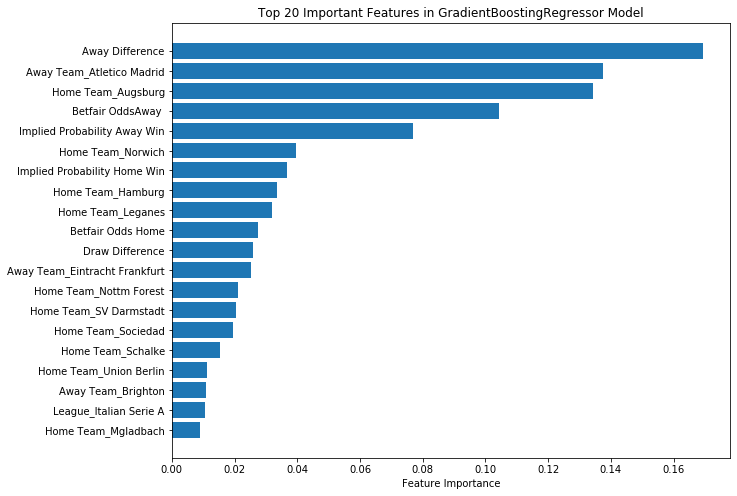

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'grid_search' is your GridSearchCV object
# Access the best estimator
best_model = grid_search.best_estimator_

# Now, use 'best_model' to access feature importances
feature_importance = best_model.feature_importances_

# Assuming X_train is your training feature set before splitting and scaling
# If you used pd.get_dummies or similar, ensure to get the feature names correctly
feature_names = X.columns

# Sort the feature importances in descending order and plot
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_names = [feature_names[i] for i in sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(sorted_names[:20], feature_importance[sorted_idx][:20], align='center')  # Adjust the number to display as needed
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features in GradientBoostingRegressor Model")
plt.gca().invert_yaxis()  
plt.show()


In [51]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame loaded with the data
# Here's how you filter based on the provided example criteria

def filter_league_matches(df, league, outcome_type, odds_range, diff_range):
    """
    Filter matches based on league, outcome type, odds range, and team performance difference.

    :param df: DataFrame containing the match data.
    :param league: The league to filter matches from (e.g., 'England').
    :param outcome_type: Type of outcome ('Home', 'Draw', 'Away').
    :param odds_range: Tuple (min_odds, max_odds) for filtering.
    :param diff_range: Tuple (min_diff, max_diff) for filtering based on team difference.
    :return: DataFrame with filtered matches.
    """
    # Filter by league
    league_df = df[df['League'] == league]
    
    # Apply odds and difference range filters based on outcome type
    if outcome_type == 'Home':
        filtered_df = league_df[(league_df['Betfair Odds Home'] >= odds_range[0]) & 
                                (league_df['Betfair Odds Home'] <= odds_range[1]) &
                                (league_df['Home Difference'] >= diff_range[0]) &
                                (league_df['Home Difference'] <= diff_range[1])]
        
    elif outcome_type == 'Draw':
        filtered_df = league_df[(league_df['Betfair Odds Draw'] >= odds_range[0]) & 
                                (league_df['Betfair Odds Draw'] <= odds_range[1]) &
                                (league_df['Draw Difference'] >= diff_range[0]) &  # Assuming you have this or similar
                                (league_df['Draw Difference'] <= diff_range[1])]   # Adjust according to your criteria

    elif outcome_type == 'Away':
        filtered_df = league_df[(league_df['Betfair OddsAway '] >= odds_range[0]) & 
                                (league_df['Betfair OddsAway '] <= odds_range[1]) &
                                (league_df['Away Difference'] >= diff_range[0]) &
                                (league_df['Away Difference'] <= diff_range[1])]
    
    return filtered_df

# Example usage based on your criteria for England
england_home_1 = filter_league_matches(df, 'England', 'Home', (1.41, 1.60), (-2, -6))
england_home_2 = filter_league_matches(df, 'England', 'Home', (3.51, 6), (10, 20))


In [52]:
def calculate_profit(filtered_df, stake=10):
    """
    Calculate the profit or loss from betting on filtered matches.
    
    :param filtered_df: DataFrame containing filtered matches based on criteria.
    :param stake: The amount of money staked on each bet.
    :return: Total profit or loss.
    """
    profit = 0
    for index, row in filtered_df.iterrows():
        # Assuming a win (1), loss (-1), and draw (0) outcome is determined by 'FT1X2'
        actual_outcome = 1 if row['FT1X2'] == '1' else -1 if row['FT1X2'] == '2' else 0
        if actual_outcome == 1:  # Home win
            profit += (stake * (row['Betfair Odds Home'] - 1))
        else:
            profit -= stake  # Loss the stake if not a win

    return profit

# Example calculation for England Home_1 filtered matches
profit_england_home_1 = calculate_profit(england_home_1)
print(f"Profit for England Home_1 bets: {profit_england_home_1}")


Profit for England Home_1 bets: 0


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Convert 'Date' from string to datetime, if not already
df['Date'] = pd.to_datetime(df['Date'])

# Optionally, encode categorical variables such as 'League', 'Home Team', 'Away Team'
df = pd.get_dummies(df, columns=['League', 'Home Team', 'Away Team'])

# Feature selection - choose features that are likely to predict match outcomes
features = ['Betfair Odds Home', 'Betfair Odds Draw', 'Betfair OddsAway ',
            'Home Difference', 'Draw Difference', 'Away Difference',
            'Implied Probability Home Win', 'Implied Probability Draw', 
            'Implied Probability Away Win'] + list(df.filter(regex='League_|Home Team_|Away Team_').columns)

# Target variable - here we'll predict 'Home BACK' as an example
target = 'Home BACK'

# Split the dataset
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)


In [55]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 2.026286256461967
R^2 Score: -0.04664029789255619


In [56]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the model
model = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)

# Use the best estimator for predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Squared Error (Best Model): {mse_best}")
print(f"R^2 Score (Best Model): {r2_best}")


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best R2 score: -0.007754584391504249
Mean Squared Error (Best Model): 1.9492250854641562
R^2 Score (Best Model): -0.00683579015734237


In [57]:
def simulate_betting(y_true, y_pred, odds, stake=10, confidence_threshold=0.5):
    total_bets = 0
    total_winnings = 0
    
    # Assume y_pred is the predicted probability of the home team winning
    for true, pred, odd in zip(y_true, y_pred, odds):
        if pred >= confidence_threshold:
            total_bets += stake
            if true == 1:  
                total_winnings += (stake * odd) - stake
            else:
                total_winnings -= stake  
    
    return total_winnings - total_bets  # Net profit


odds_test = X_test['Betfair Odds Home'] 


profit = simulate_betting(y_test, y_pred_best, odds_test, stake=10, confidence_threshold=0.5)
print(f"Net Profit from Simulation: {profit}")


Net Profit from Simulation: -380


In [71]:
# Assuming X_train_scaled and y_train are already defined and preprocessed
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_scaled, y_train)  # Ensure this step is executed


GradientBoostingRegressor(random_state=42)

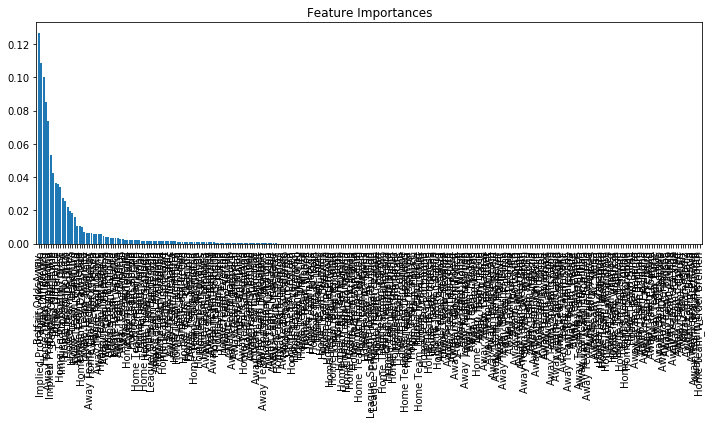

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Accessing feature importances only after the model is fitted
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Ensure the correct features names are used
# This assumes 'features' variable correctly references the names of the features used for training
feature_names = np.array(features)  # Assuming 'features' is a list of your feature names

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_scaled.shape[1]), feature_importances[indices], align="center")

# Use 'feature_names' to get the actual feature names for the x-ticks labels
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.tight_layout()  # Adjust layout to make room for the rotated x-tick labels
plt.show()


In [59]:
from sklearn.preprocessing import PolynomialFeatures

# Example: Creating polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)

# Names of the new polynomial features
poly_features_names = poly.get_feature_names_out(features)

# Convert to DataFrame for easier manipulation and understanding
X_poly_df = pd.DataFrame(X_poly, columns=poly_features_names)

# Fit the model on the new polynomial features
model_poly = GradientBoostingRegressor(random_state=42)
model_poly.fit(X_poly_df, y_train)


GradientBoostingRegressor(random_state=42)

In [63]:
from sklearn.model_selection import RandomizedSearchCV

# Define a simplified parameter distribution
param_dist_poly = {
    'n_estimators': [100],  # Reduced number of estimators
    'max_depth': [3],  # Reduced max depth
    'learning_rate': [0.1]  # Standard learning rate
}

random_search_poly = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist_poly,
    n_iter=5, cv=3, scoring='r2',
    random_state=42,
    n_jobs=1  # Limit to 1 to reduce memory usage
)


# Fit RandomizedSearchCV on the polynomial features
random_search_poly.fit(X_poly_df, y_train)

# Output the best parameters and score found by RandomizedSearchCV
print("Best parameters (poly features, simplified):", random_search_poly.best_params_)
print("Best R2 score (poly features, simplified):", random_search_poly.best_score_)


Best parameters (poly features, simplified): {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Best R2 score (poly features, simplified): -0.013052314030753612


In [65]:
# Transform test data with the same polynomial features
X_test_poly = poly.transform(X_test_scaled)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_features_names)

# Use the best estimator from the simplified search for predictions on the test set
y_pred_poly_best_simplified = random_search_poly.best_estimator_.predict(X_test_poly_df)

# Evaluate the best model with simplified parameters
mse_poly_best_simplified = mean_squared_error(y_test, y_pred_poly_best_simplified)
r2_poly_best_simplified = r2_score(y_test, y_pred_poly_best_simplified)

print(f"Mean Squared Error (Poly Features, Best Model, Simplified): {mse_poly_best_simplified}")
print(f"R^2 Score (Poly Features, Best Model, Simplified): {r2_poly_best_simplified}")


Mean Squared Error (Poly Features, Best Model, Simplified): 2.050672204897956
R^2 Score (Poly Features, Best Model, Simplified): -0.05923640382479567


In [66]:
# Define the simulation function
def simulate_betting(y_true, y_pred, betting_odds, threshold=0.5, stake=10):
    """
    Simulate betting strategy and calculate net profit.
    - Bets are placed only if predicted probability is above the threshold.
    - Net profit is calculated based on betting odds.
    """
    net_profit = 0
    for true, pred, odds in zip(y_true, y_pred, betting_odds):
        if pred > threshold:  # Place bet based on model's confidence
            if true == 1:  # Win
                net_profit += (odds - 1) * stake
            else:  # Loss
                net_profit -= stake
    return net_profit

# Ensure betting_odds are appropriately retrieved from your test data
betting_odds = X_test_scaled[:, features.index('Betfair Odds Home')]  # Adjust based on actual data structure

# Run simulation
net_profit = simulate_betting(y_test, y_pred_poly_best_simplified, betting_odds, threshold=0.5, stake=10)
print(f"Net Profit from Simulation: {net_profit}")


Net Profit from Simulation: -870


In [67]:
# Potential next steps in code - Example of ensemble method

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Define base models
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor(max_depth=5)

# Define ensemble model
model_ensemble = VotingRegressor(estimators=[('lr', model_lr), ('dt', model_dt), ('gb', model)], n_jobs=-1)

# Fit ensemble model
model_ensemble.fit(X_train_scaled, y_train)

# Predictions and evaluation for ensemble model
y_pred_ensemble = model_ensemble.predict(X_test_scaled)

mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"MSE (Ensemble): {mse_ensemble}")
print(f"R^2 (Ensemble): {r2_ensemble}")

# Adapt the betting simulation function call as needed


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.
